<a href="https://colab.research.google.com/github/steve-shim/dlgom/blob/main/deeplearning/%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94_%EB%89%B4%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_breast_cancer
import numpy as np

In [5]:
cancer = load_breast_cancer()

In [6]:
# 유방암 데이터 569개의 샘플 + 30개의 특성 존재
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [7]:
# 유방암(1), 정상(0) 으로 분류 되어져 있다 
cancer.target[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [8]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

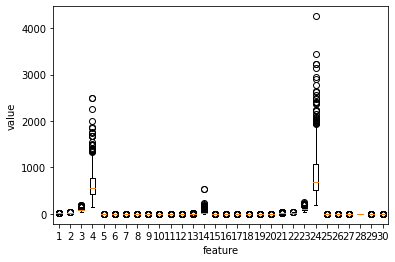

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [10]:
# 넓이와 관련된 특성의 값들이 다른 특성들에 비해서 큰값들을 가지고 있다
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [11]:
np.unique(cancer.target, return_counts=True) # 0.627

(array([0, 1]), array([212, 357]))

In [12]:
X = cancer.data
y = cancer.target
print(X.shape, y.shape)

(569, 30) (569,)


훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 한다.

양성 클래스가 음성 클래스보다 많기 때문에 클래스 비율이 일정하지 않게 분배되는 샘플링 편향 현상이 발생할 수 있다.

stratify=y 를 하면서 처음 데이터의 클래스 비율을 유지하면서 훈련 데이터, 테스트 데이터를 나눈다

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [15]:
print(np.unique(y_train, return_counts=True)) # 0.626
print(np.unique(y_test, return_counts=True)) # 0.631

(array([0, 1]), array([170, 285]))
(array([0, 1]), array([42, 72]))


In [16]:
# 로지스틱 뉴런 구현
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100): # x: (455, 30), y: (455,)
    self.w = np.ones(x.shape[1])   # 샘플의 특성의 갯수(30개) 만큼 1로 채워진 배열을 만든다
    self.b = 0
    
    # 샘플하나마다 가중치를 업데이트를 한다 (총 가중치 업데이트 횟수 = epochs수 x 샘플(455) 수)
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        z = self.forpass(x_i)   # x_i : (30,)
        a = self.activation(z)  # z = w1*x1 + w2*x2 + ... + w30*x30 + b  -> 특성들마다 곱해지는 가중치들의 합인 선형회귀값 하나
        err = -(y_i - a)        # a = sigmoid(z) -> 양성 클래스(암)로 예측하는 확률값 하나
                                # 샘플하나의 정답과 샘플하나의 예측값의 차이인 err 값 하나로
        w_grad, b_grad = self.backprop(x_i, err) # 샘플하나로 30개의 특성의 그라디언트를 생성
        self.w -= w_grad        # 기존 가중치에서 그라디언트를 빼면서 샘플하나로 샘플의 특성들(30개)의 가중치를 모두 업데이트 한다
        self.b -= b_grad
        
  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1+np.exp(-z))
    return a

  def predict(self, x):                   # x: (114, 30)
    z = [self.forpass(x_i) for x_i in x]  # 샘플마다 선형회귀값 하나씩 나오면서 길이가 114인 리스트가 만들어진다
    a = self.activation(np.array(z))      # 샘플마다 양성클래스로 예측한 확률값 출력 (114,)
    return a > 0.5


In [17]:
neuron = LogisticNeuron()

In [18]:
neuron.fit(X_train, y_train)

In [19]:
np.mean(neuron.predict(X_test) == y_test)

0.8245614035087719

In [20]:
neuron.predict(X_test)

array([False,  True, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True,  True])

In [39]:
# 단일층 신경망 클래스

class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a
  
  def fit(self, x, y, epochs=100): # X: (455,30), y: (455,)
    self.w = np.ones(x.shape[1])   # 샘플의 특성의 갯수만큼 가중치 초기화
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # X배열 자체를 섞지않고 X의 길이의 인덱스 배열을 섞는다 (0~454)
      # SGD(확률적 경사하강법)은 epochs 마다 전체 샘플을 섞어준다 
      for i in indexes:
        z = self.forpass(x[i])  # (30,) -> 선형회귀값 하나 출력
        a = self.activation(z)  # 양성클래스 예측값 하나 출력
        err = -(y[i] - a)       # 샘플마다 err 값이 하나 출력
        w_grad, b_grad = self.backprop(x[i], err) # err 값 하나로 특성 30개의 그라디언트를 계산
        self.w -= w_grad        # 샘플 하나로 특성 30개의 가중치 업데이트 
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 샘플마다 정답과의 차이인 오차를 누적하고
      self.losses.append(loss/len(y))                  # 에포크마다 평균 손실을 저장 
    
  def predict(self, x):                  # 2. x: (114, 30)
    z = [self.forpass(x_i) for x_i in x] 
    return np.array(z) > 0               # 3. (114,)

  def score(self, x, y):                  # 1. x: (114, 30), y: (114,)
    return np.mean(self.predict(x) == y)  # 4. np.mean( (114,) == (114,) )


In [40]:
layer = SingleLayer()

In [41]:
layer.fit(X_train, y_train)

In [42]:
layer.score(X_test, y_test)

0.9210526315789473

<class 'list'>


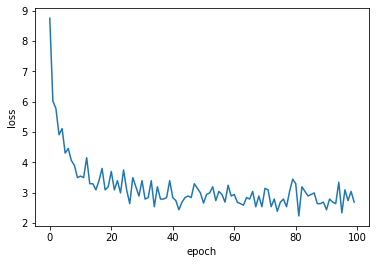

In [43]:
# 에포크마다 기록된 평균 손실값의 변화 시각화
print(type(layer.losses))
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [27]:
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.8333333333333334

In [29]:
X_test[0:10].shape

(10, 30)

In [30]:
sgd.predict(X_test[0:10]) 
# 사이킷런은 입력데이터로 2차원 배열만 받아들인다
# X_test의 샘플 10개를 훈련된 모델로 유방암(1)인지 아닌지(0) 예측한다  

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])